<a href="https://colab.research.google.com/github/Gowsalyavalli/TimeSeriesAnalysis/blob/main/TimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving TimeSeriesAnalysis.csv to TimeSeriesAnalysis (1).csv


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


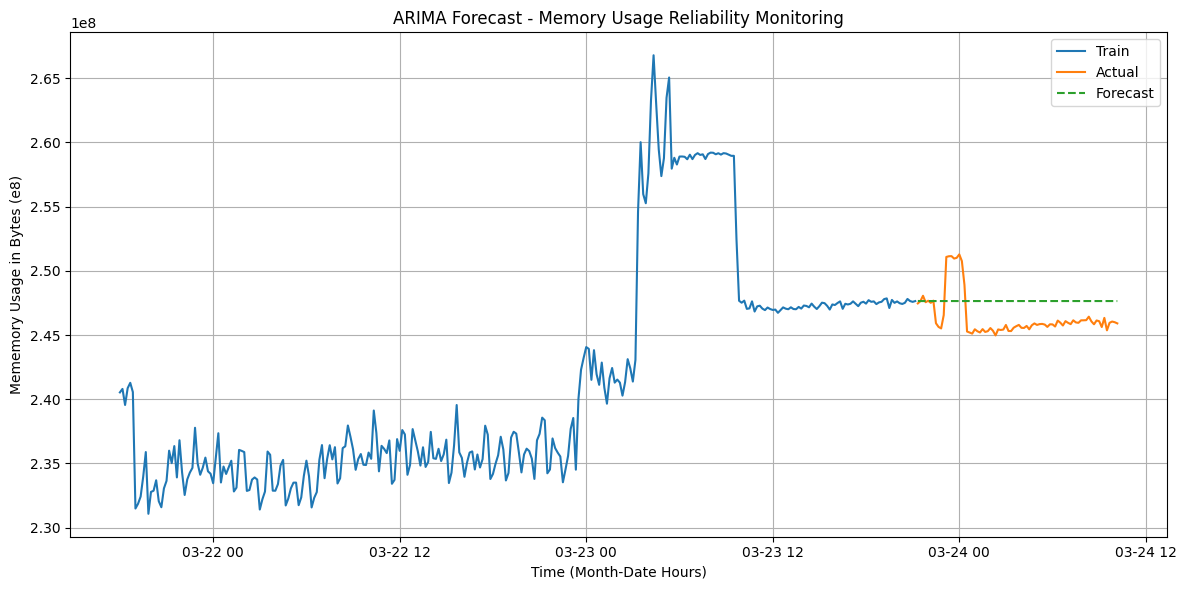

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import io
from google.colab import files
uploaded = files.upload()
# === Load PerfMon Exported Data ===
# Example CSV structure: Timestamp,Memory_Usage
df = pd.read_csv('TimeSeriesAnalysis.csv',encoding='latin1',on_bad_lines='skip',engine='python')

df['TimeStamp'] = pd.to_datetime(df['TimeStamp']) # Assuming 'Timestamp' is the name of your time column
df = df.set_index('TimeStamp')
# === Preprocess Data ===
# Resample to uniform interval and interpolate missing values
df = df.resample('10min').mean().interpolate()

# === Select Metric to Forecast (e.g., CPU Usage) ===
y = df['Memory']

# === Train/Test Split ===
train_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]

# === Build ARIMA Model ===
# Tune (p,d,q) based on AIC/BIC or use auto_arima (optional)
model = ARIMA(train, order=(5, 1, 2))
model_fit = model.fit()

# === Forecast ===
forecast = model_fit.forecast(steps=len(test))

# === Plot Forecast vs Actual ===
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.xlabel('Time (Month-Date Hours)')
plt.ylabel('Mememory Usage in Bytes (e8)')
plt.title('ARIMA Forecast - Memory Usage Reliability Monitoring')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
